In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from scipy.stats import boxcox

In [9]:
df = pd.read_csv('Train.csv')

# Stage 1

# Soal 1

In [10]:
numerical   = ['Customer_care_calls','Cost_of_the_Product',
              'Prior_purchases','Discount_offered','Weight_in_gms']
categorical = ['Warehouse_block','Mode_of_Shipment','Product_importance','Gender']
categoricals = ['Customer_rating','Reached.on.Time_Y.N']
categorical_1 = ['Warehouse_block','Mode_of_Shipment','Product_importance','Gender','Customer_rating','Reached.on.Time_Y.N']

In [11]:
df.head(5)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [12]:
df['Warehouse_block'] = df['Warehouse_block'].replace(['F'], ['E'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [14]:
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [15]:
df[categorical].describe()

,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
count,10999,10999,10999,10999
unique,5,3,3,2
top,E,Ship,low,F
freq,3666,7462,5297,5545


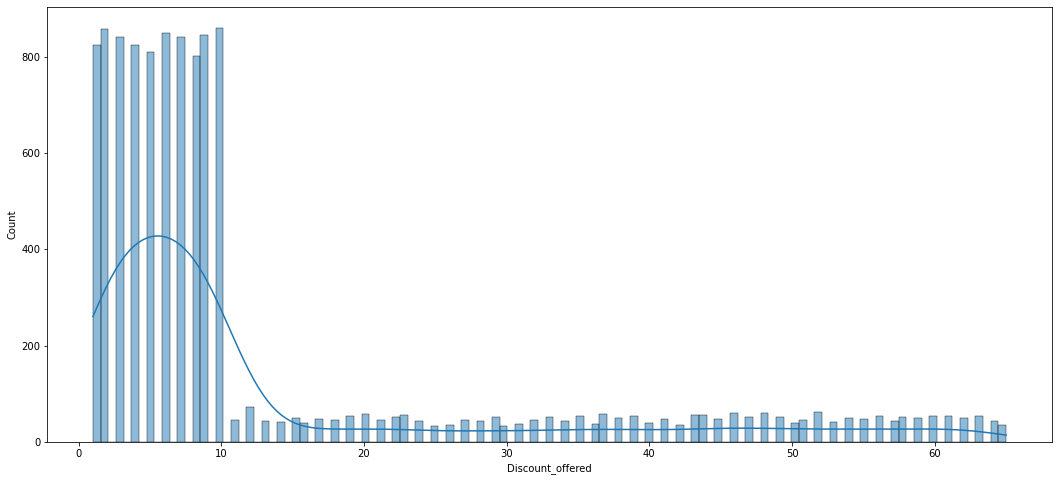

In [16]:
plt.figure(figsize=(18,8))
ax = sns.histplot(df, x='Discount_offered', linewidth=0.4, kde = True)

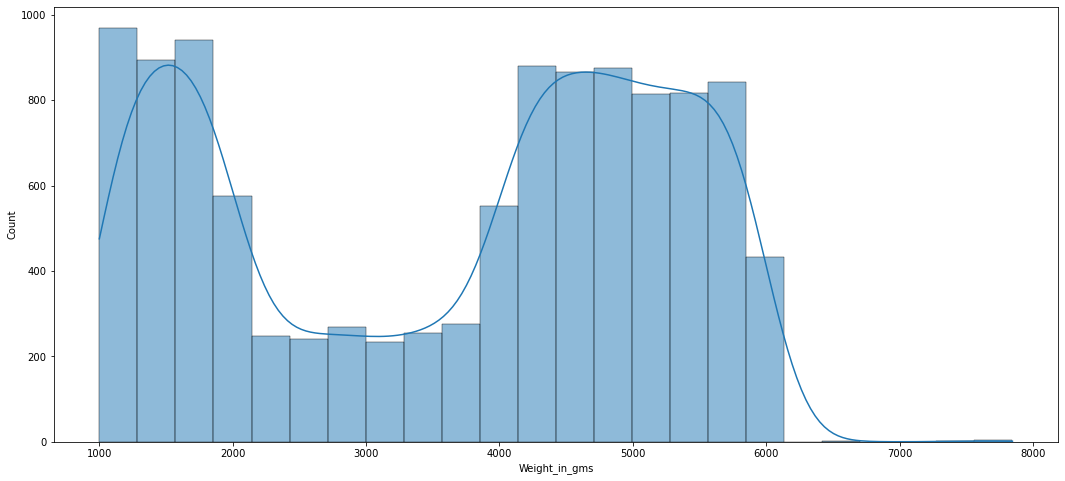

In [17]:
plt.figure(figsize=(18,8))
ax = sns.histplot(df, x='Weight_in_gms', linewidth=0.4, kde = True)

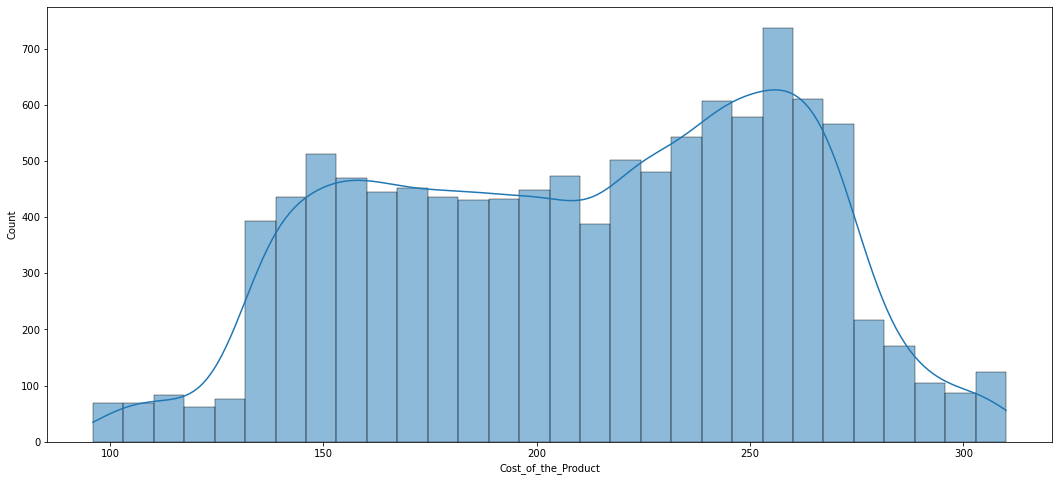

In [18]:
plt.figure(figsize=(18,8))
ax = sns.histplot(df, x='Cost_of_the_Product', linewidth=0.4, kde = True)

In [19]:
df['Product_importance'].value_counts()

low       5297
medium    4754
high       948
Name: Product_importance, dtype: int64

# No 1 <br>

Apakah ada kolom dengan tipe data kurang sesuai, atau nama kolom dan isinya
kurang sesuai? <br>
- Tidak ada, untuk isi dari tiap kolomnya sudah sesuai

Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja? <br>
- Tidak ada, seluruh kolom tidak memiliki nilai kosong

Apakah ada kolom yang memiliki nilai summary agak aneh? <br>
- Pada kolom cost_of_product dan weight_in_gms membentuk Negatif Skewed karena nilai Median > mean 
- Pada kolom Discount_offered membetuk Positif skewed karena nilai Mean > median

Hasil pengamatan dan rekomendasi
- Pada kolom cost_of_product dan weight_in_gms membentuk Negatif Skewed sehingga harus dilakukan feautere transofrmasion agar nantinya menjadi Normal Skewed
- Pada kolom Discount_offered membentuk Positif skewed sehingga harus dilakukan feature transformation agar nantinya menjadi Normal Skewed
- Kolom ID memiliki banyak nilai Unique sehingga harus di drop

# No 2

## Numerical

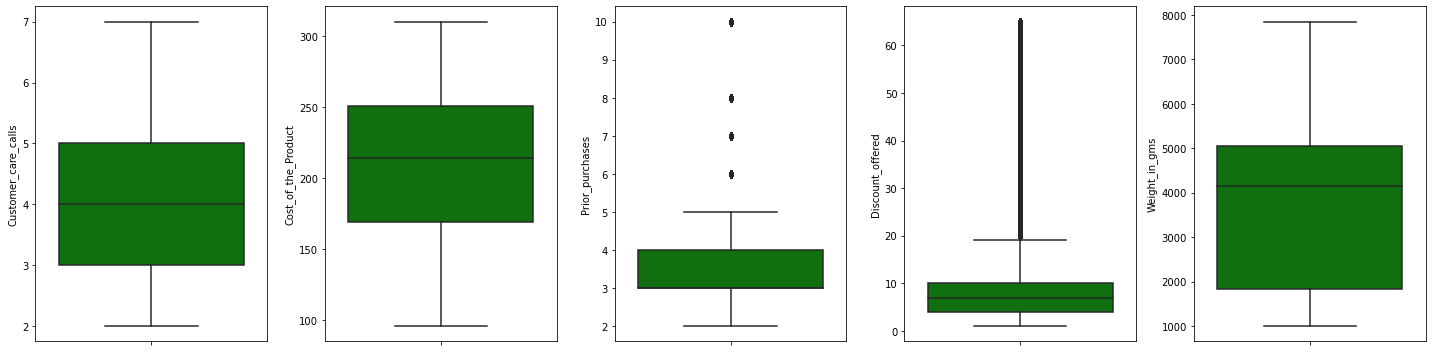

In [20]:
plt.figure(figsize=(20,5))
for i in range(0, len(numerical)):
    plt.subplot(1, len(numerical), i+1)
    sns.boxplot(y=df[numerical[i]], color='green', orient='v')
    plt.tight_layout()

Untuk boxplot, hal paling penting yang harus kita perhatikan adalah keberadaan outlier. <br>
* Outlier pada kolom prior purchases tidak perlu dibuang dikarenakan nilainya masih dalam batas wajar (kecuali ada nilai yang < 0 sehingga harus dilakukan drop pada kolom tersebut)
* Outlier pada kolom Discount offered tidak perlu dibuang dikarenakan discount yang diberikan masih dalam batas wajar (karena discount yang diberikan tidak melebihi 100%)

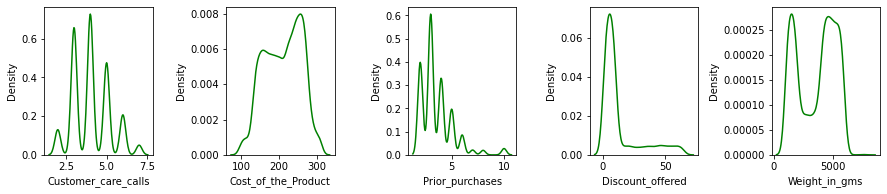

In [21]:
plt.figure(figsize=(20,5))
for i in range(0, len(numerical)):
    plt.subplot(2, 8, i+1)
    sns.kdeplot(x=df[numerical[i]], color='green')
    plt.xlabel(numerical[i])
    plt.tight_layout()

Untuk distribution plot, hal utama yang perlu diperhatikan adalah bentuk distribusi:
- Pada kolom cost_of_product dan weight_in_gms membentuk grafik berbentuk bimodal sehingga harus di tranformasi agar nantinya berbentuk Normal skewed 
- Pada kolom customer_care_calls dan prior purchases membentuk grafik berbentuk multimodal sehingga harus dilakukan transofrmasi agar nantinya menjadi Normal Skewed
- Pada kolom Discount_offered membentuk Positif skewed sehingga harus dilakukan transformati agar nantinya menjadi Normal Skewed

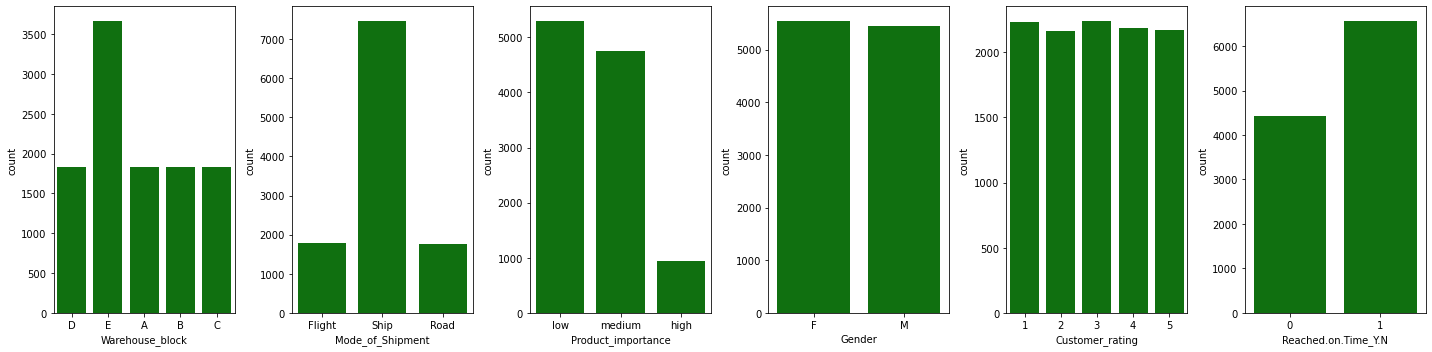

In [22]:
plt.figure(figsize=(20,5))
for i in range(0, len(categorical_1)):
    plt.subplot(1, len(categorical_1), i+1)
    sns.countplot(x=df[categorical_1[i]], color='green', orient='v')
    plt.tight_layout()

In [23]:
print(df['Reached.on.Time_Y.N'].value_counts(normalize=True))

1    0.596691
0    0.403309
Name: Reached.on.Time_Y.N, dtype: float64


Terakhir kita lihat count plot untuk setiap data. 
- Data yang didapat dalam kolom categoricals masih dalam batas wajar karena tidak ada nilai yang mendominasi dan kategori dari tiap kolom tidak terlalu banyak sehingga feature masih bisa dipertahankan

Gunakan visualisasi untuk melihat distribusi masing-masing kolom (feature maupun target). Tuliskan hasil observasinya, misalnya jika ada suatu kolom yang distribusinya menarik (misal skewed, bimodal, ada outlier, ada nilai yang mendominasi, kategorinya terlalu banyak, dsb). Jelaskan juga apa yang harus di follow up saat data preprocessing <br>

Hal yang harus dilakukan ketika preprocessing 
- Pada kolom cost_of_product dan weight_in_gms membentuk grafik berbentuk bimodal sehingga harus di tranformasi agar nantinya berbentuk Normal skewed 
- Pada kolom customer_care_calls dan prior purchases membentuk grafik berbentuk multimodal sehingga harus dilakukan transofrmasi agar nantinya menjadi Normal Skewed
- Pada kolom Discount_offered membentuk Positif skewed sehingga harus dilakukan transformati agar nantinya menjadi Normal Skewed

# Soal 3

In [24]:
df.corr()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
ID,1.000000,0.188998,-0.005722,0.196791,0.145369,-0.598278,0.278312,-0.411822
Customer_care_calls,0.188998,1.000000,0.012209,0.323182,0.180771,-0.130750,-0.276615,-0.067126
Customer_rating,-0.005722,0.012209,1.000000,0.009270,0.013179,-0.003124,-0.001897,0.013119
Cost_of_the_Product,0.196791,0.323182,0.009270,1.000000,0.123676,-0.138312,-0.132604,-0.073587
Prior_purchases,0.145369,0.180771,0.013179,0.123676,1.000000,-0.082769,-0.168213,-0.055515
Discount_offered,-0.598278,-0.130750,-0.003124,-0.138312,-0.082769,1.000000,-0.376067,0.397108
Weight_in_gms,0.278312,-0.276615,-0.001897,-0.132604,-0.168213,-0.376067,1.000000,-0.268793
Reached.on.Time_Y.N,-0.411822,-0.067126,0.013119,-0.073587,-0.055515,0.397108,-0.268793,1.000000


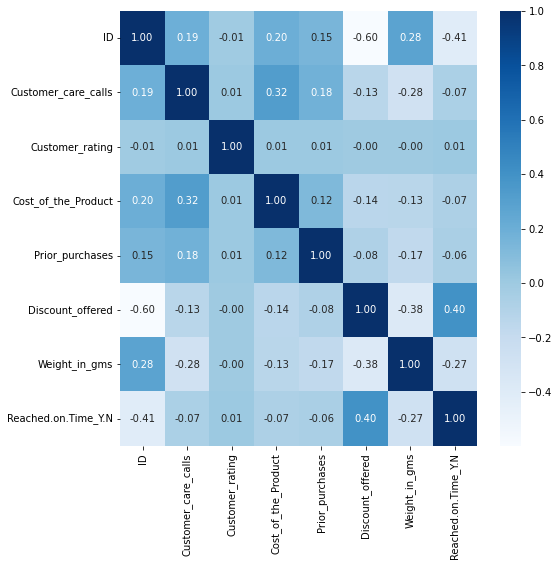

In [25]:
# correlation heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f');

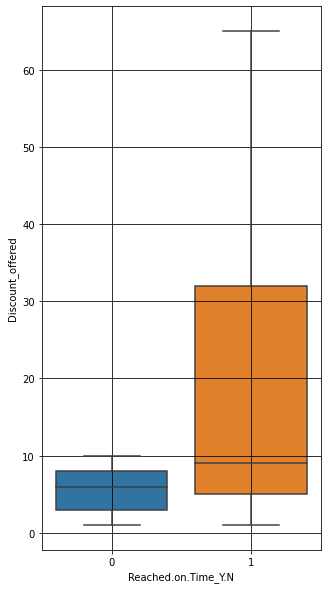

In [26]:
plt.figure(figsize=(5,10))
sns.boxplot(x='Reached.on.Time_Y.N', y='Discount_offered', data=df);
pyplot.grid(True,color='black')
plt.show()

<Figure size 864x576 with 0 Axes>

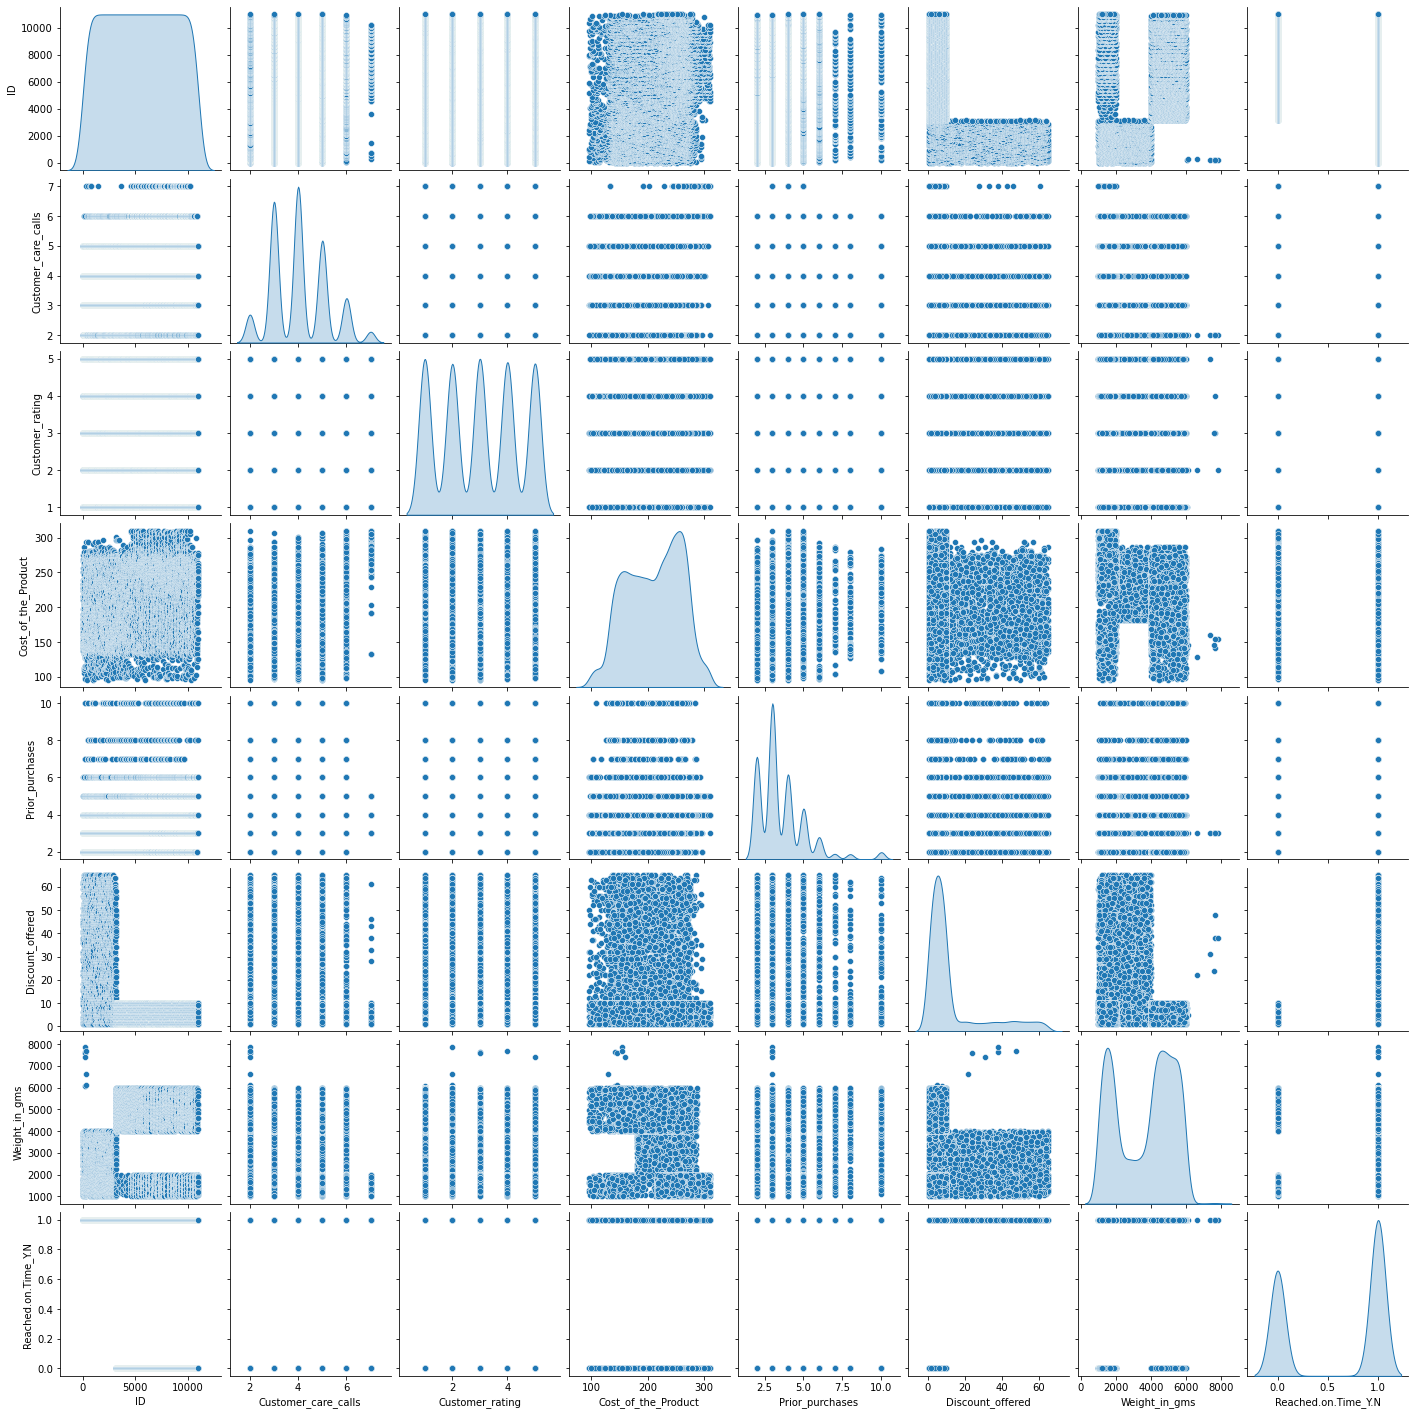

In [27]:
plt.figure(figsize=(12,8))
sns.pairplot(df, diag_kind='kde');

Lakukan multivariate analysis (seperti correlation heatmap dan category plots, sesuai yang diajarkan di kelas). Tuliskan hasil observasinya, seperti: <br>
A. Bagaimana korelasi antara masing-masing feature dan label. Kira-kira feature mana saja yang paling relevan dan harus dipertahankan? <br>
- Korelasi dari kolom Reached.on.Time_Y.N dan Discount_offered menujukkan hubungan korelasi positif cukup kuat sehingga merupakan strong potential feature dan harus dipertahankan (Semakin banyak discount yang diberikan dapat menyebabkan keterlambatan dalam pengiriman paket)
- Korelasi dari kolom Weight_in_gms dan Reached.on.Time_Y.N menunjukkan hubungan korelasi negatif cukup kuat sehingga berpontensi menjadi potential feature
- Tidak ada fitur yang redundan dikarenakan nilai korelasi antar fitur tidak ada yang lebih besar dari 0.4
- Korelasi dari kolom Customer_rating, Weight_in_gms, dan Discount_offered sangat lemah, menandakan fitur tersebut tidak dapat dijadikan feature
B. Bagaimana korelasi antar-feature, apakah ada pola yang menarik? Apa yang perlu dilakukan terhadap feature itu? <br>
- Berdasakan grafik yang ditujukkan diatas kolom Reached.on.Time_Y.N dan Discount_offered menujukkan hubungan korelasi positif, kami telah melakukan visualisasi data yang menunjukkan bahwa semakin banyak diskon yang diberikan makan semakin banyak juga keterlambatan dalam pengiriman
* Tuliskan juga jika memang tidak ada feature yang saling berkorelas <br>

# Soal 4

Selain EDA, lakukan juga beberapa analisis dan visualisasi untuk menemukan suatu business insight.Tuliskan minimal 3 Insight, dan berdasarkan insight tersebut jelaskan rekomendasinya untuk bisnis.

# Business Insight

In [28]:
df.head(5)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,E,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


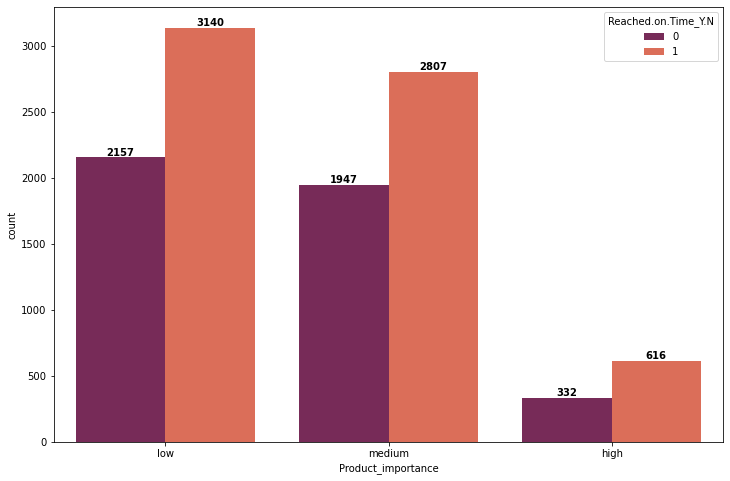

In [29]:
fig, ax = plt.subplots(figsize=(12,8))
sns.countplot('Product_importance', hue = 'Reached.on.Time_Y.N', data = df, palette='rocket')
for label in ax.containers: #Untuk bikin angka diatas bar
    ax.bar_label(label, fontweight='bold')
plt.show()

Untuk paket yang memiliki importance high banyak yang mengalami keterlambatan dalam pengiriman

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


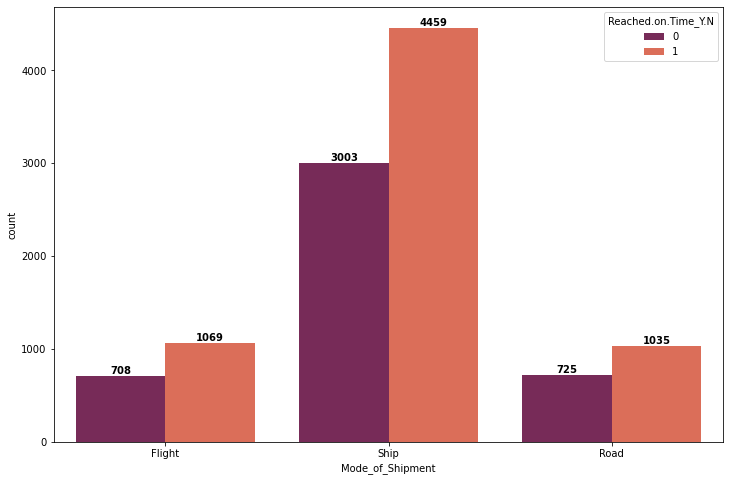

In [30]:
fig, ax = plt.subplots(figsize=(12,8))
sns.countplot('Mode_of_Shipment', hue = 'Reached.on.Time_Y.N', data = df, palette='rocket')
for label in ax.containers: #Untuk bikin angka diatas bar
    ax.bar_label(label, fontweight='bold')
plt.show()

- Pengiriman dengan kapal yang paling banyak mengalami keterlambatan dibandingkan dengan metode pengiriman yang lain

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


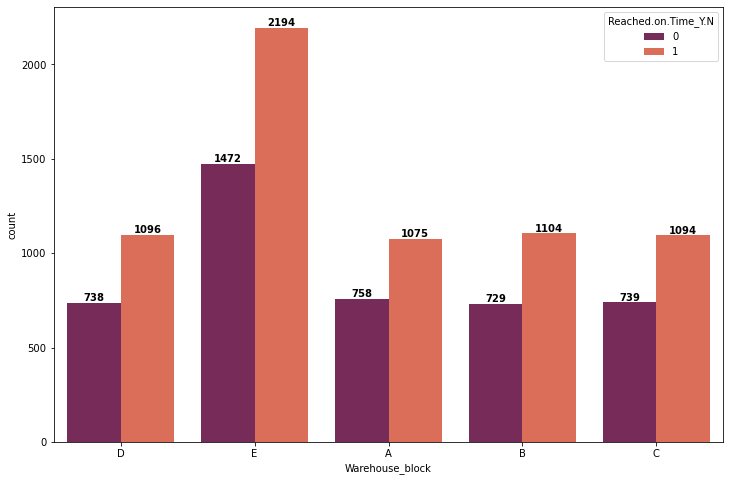

In [31]:
fig, ax = plt.subplots(figsize=(12,8))
sns.countplot('Warehouse_block', hue = 'Reached.on.Time_Y.N', data = df, palette='rocket')
for label in ax.containers: #Untuk bikin angka diatas bar
    ax.bar_label(label, fontweight='bold')
plt.show()

- Setiap warehouse sering mengalami keterlambatan dalam pengiriman, pada warehouse block f sering mengalami keterlambatan hal ini mungkin terjadi karena banyak metode pengiriman yang menggunakan kapal

# Stage 2

## Data Preprocessing

In [32]:
df_new = df.drop(columns=['ID'])

In [33]:
#Mengubah isi kolom warehouse block dari F menjadi E
df_new['Warehouse_block'] = df_new['Warehouse_block'].replace(['F'], ['E'])

In [34]:
#Mengubah kolom Reached_on_Time
df_new.rename(columns = {'Reached.on.Time_Y.N':'Reached_on_Time'}, inplace = True)

Lakukan Pembersihan data, sesuai yang diajarkan di kelas, seperti: <br>
* a. Handle missing values <br>
* b. Handle duplicated data <br>
* c. Handle outliers <br>
* d. Feature transformation <br>
* e. Feature encoding <br>
* f. Handle class imbalance <br>
* Dilaporan homework, tuliskan apa saja yang telah dilakukan dan metode yang digunakan <br>

* Tetap tuliskan jika memang tidak ada yang perlu di handle (contoh: "Tidak perlu feature encoding karena semua feature sudah numerical" atau "Outlier tidak di handle karena akan fokus menggunakan model yang robust terhadap outlier")

# A. Handle missing values

In [35]:
df_new.isna().sum()

Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached_on_Time        0
dtype: int64

Tidak ada nilai yang hilang sehingga tidak ada yang harus di handle

# B. Handle Duplicated data

In [36]:
df_new.duplicated().sum()

0

Tidak ada values yang duplikasi sehingga tidak ada data yang harus di hande

# C. Handle outliers

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


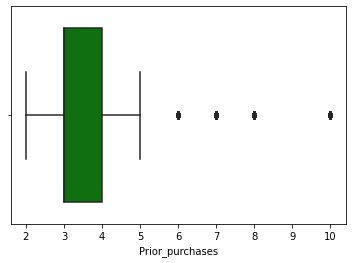

In [37]:
sns.boxplot(x=df_new["Prior_purchases"], color='green', orient='v');

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


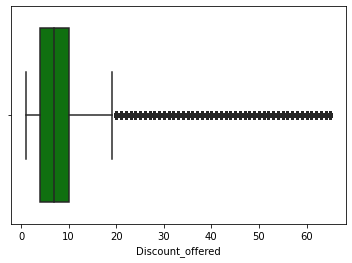

In [38]:
sns.boxplot(x=df_new["Discount_offered"], color='green', orient='v');

Kesimpulan
* Outlier pada kolom prior purchases tidak perlu dibuang dikarenakan nilainya masih dalam batas wajar (kecuali ada nilai yang < 0 sehingga harus dilakukan drop pada kolom tersebut)
* Outlier pada kolom Discount offered tidak perlu dibuang dikarenakan discount yang diberikan masih dalam batas wajar (karena discount yang diberikan tidak melebihi 100%)

# D. Feature Transformation

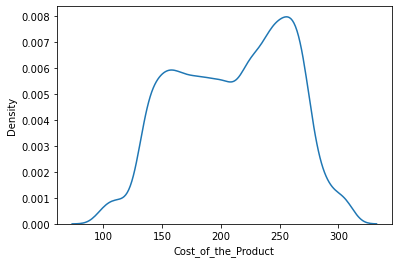

In [39]:
sns.kdeplot(x=df_new["Cost_of_the_Product"]);

In [40]:
# Fungsi untuk mengetahui berapa skewed grafik tersebut
""" jika nilai skewed -0.5 atau 0.5 adalah Fairy Symmetrical
    jika nilai skewed -0.5 sampai -1.0 dan 0.5 sampai 1.0 adalah Moderate Skewed
    jika nilai skewed < -1.0 dan > 1.0 adalah Highly Skewed
"""
df_new[('Cost_of_the_Product')].agg(['skew', 'kurtosis']).transpose().reset_index()

,index,Cost_of_the_Product
0,skew,-0.157117
1,kurtosis,-0.972160


In [41]:
df_new['Cost_of_the_Product'] = np.random.exponential(size=10999)

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


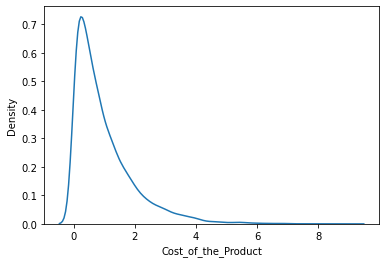

In [42]:
sns.distplot(df_new['Cost_of_the_Product'], hist=False, kde=True);

In [43]:
df_new['Cost_of_the_Product_tf'], _ = boxcox(df_new['Cost_of_the_Product'])

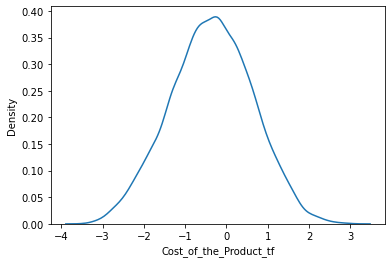

In [44]:
sns.kdeplot(x=df_new["Cost_of_the_Product_tf"]);

In [45]:
df_new['Cost_of_the_Product_tf'] = StandardScaler().fit_transform(df_new['Cost_of_the_Product'].values.reshape(len(df), 1))

## Discount Offered

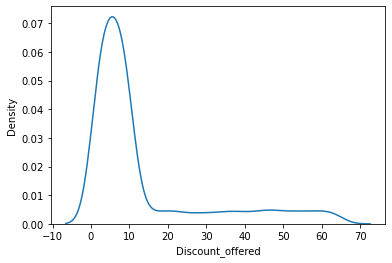

In [46]:
sns.kdeplot(x=df_new["Discount_offered"]);

In [47]:
df_new[('Discount_offered')].agg(['skew', 'kurtosis']).transpose().reset_index()

,index,Discount_offered
0,skew,1.798929
1,kurtosis,2.000586


In [48]:
df_new['Discount_offered'] = np.random.exponential(size=10999)

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


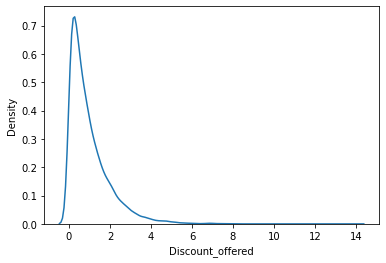

In [49]:
sns.distplot(df_new['Discount_offered'], hist=False, kde=True);

In [50]:
df_new['Discount_offered_tf'], _ = boxcox(df_new['Discount_offered'])

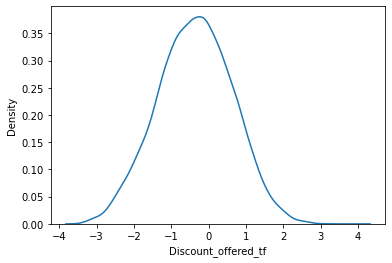

In [51]:
sns.kdeplot(x=df_new["Discount_offered_tf"]);

In [52]:
df_new['Discount_offered_tf'] = StandardScaler().fit_transform(df_new['Discount_offered'].values.reshape(len(df), 1))

## Weight in gms

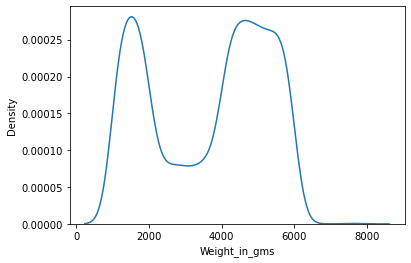

In [53]:
sns.kdeplot(x=df_new['Weight_in_gms']);

In [54]:
df_new[('Weight_in_gms')].agg(['skew', 'kurtosis']).transpose().reset_index()

,index,Weight_in_gms
0,skew,-0.249747
1,kurtosis,-1.447671


In [55]:
df_new['Weight_in_gms'] = np.random.exponential(size=10999)

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


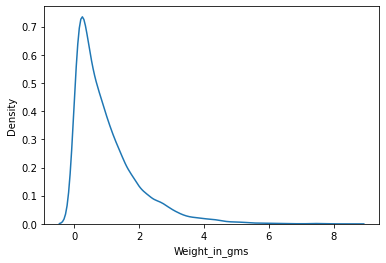

In [56]:
sns.distplot(df_new['Weight_in_gms'], hist=False, kde=True);

In [57]:
df_new['Weight_in_gms_tf'], _ = boxcox(df_new['Weight_in_gms'])

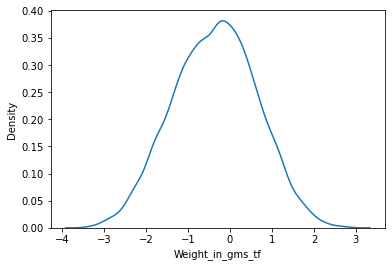

In [58]:
sns.kdeplot(x=df_new['Weight_in_gms_tf']);

In [59]:
df_new['Weight_in_gms_tf'] = StandardScaler().fit_transform(df['Weight_in_gms'].values.reshape(len(df), 1))

In [60]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Warehouse_block         10999 non-null  object 
 1   Mode_of_Shipment        10999 non-null  object 
 2   Customer_care_calls     10999 non-null  int64  
 3   Customer_rating         10999 non-null  int64  
 4   Cost_of_the_Product     10999 non-null  float64
 5   Prior_purchases         10999 non-null  int64  
 6   Product_importance      10999 non-null  object 
 7   Gender                  10999 non-null  object 
 8   Discount_offered        10999 non-null  float64
 9   Weight_in_gms           10999 non-null  float64
 10  Reached_on_Time         10999 non-null  int64  
 11  Cost_of_the_Product_tf  10999 non-null  float64
 12  Discount_offered_tf     10999 non-null  float64
 13  Weight_in_gms_tf        10999 non-null  float64
dtypes: float64(6), int64(4), object(4)
mem

In [61]:
df_new = df_new.drop(columns=['Discount_offered', 'Cost_of_the_Product','Weight_in_gms'])

In [62]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Warehouse_block         10999 non-null  object 
 1   Mode_of_Shipment        10999 non-null  object 
 2   Customer_care_calls     10999 non-null  int64  
 3   Customer_rating         10999 non-null  int64  
 4   Prior_purchases         10999 non-null  int64  
 5   Product_importance      10999 non-null  object 
 6   Gender                  10999 non-null  object 
 7   Reached_on_Time         10999 non-null  int64  
 8   Cost_of_the_Product_tf  10999 non-null  float64
 9   Discount_offered_tf     10999 non-null  float64
 10  Weight_in_gms_tf        10999 non-null  float64
dtypes: float64(3), int64(4), object(4)
memory usage: 945.4+ KB


# E. Feature encoding

In [63]:
df_new.head(5)

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Prior_purchases,Product_importance,Gender,Reached_on_Time,Cost_of_the_Product_tf,Discount_offered_tf,Weight_in_gms_tf
0,D,Flight,4,2,3,low,F,1,-0.573168,1.640229,-1.468240
1,E,Flight,4,5,2,low,M,1,-0.140355,-0.472686,-0.333893
2,A,Flight,2,2,4,low,M,1,-0.380399,-0.729526,-0.159002
3,B,Flight,3,3,4,medium,M,1,0.227050,0.477129,-1.502484
4,C,Flight,2,2,3,medium,F,1,-0.628341,-0.525786,-0.703244


In [64]:
# jenis_kelamin & pendidikan label encoding
mapping_jenis_kelamin = {
    'F' : 0,
    'M' : 1
}

mapping_warehouse_block = {
    'A' : 0,
    'B' : 1,
    'C' : 2,
    'D' : 3,
    'E' : 4
}

mapping_product_importance = {
    'low' : 0,
    'medium' : 1,
    'high' : 2
}

df_new['Gender'] = df_new['Gender'].map(mapping_jenis_kelamin)
df_new['Warehouse_block'] = df_new['Warehouse_block'].map(mapping_warehouse_block)
df_new['Product_importance'] = df_new['Product_importance'].map(mapping_product_importance)

In [65]:
# one hot encoding
for cat in ['Mode_of_Shipment']:
    onehots = pd.get_dummies(df_new[cat], prefix=cat)
    df_new = df_new.join(onehots)

In [66]:
df_new.head(5)

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Prior_purchases,Product_importance,Gender,Reached_on_Time,Cost_of_the_Product_tf,Discount_offered_tf,Weight_in_gms_tf,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship
0,3,Flight,4,2,3,0,0,1,-0.573168,1.640229,-1.468240,1,0,0
1,4,Flight,4,5,2,0,1,1,-0.140355,-0.472686,-0.333893,1,0,0
2,0,Flight,2,2,4,0,1,1,-0.380399,-0.729526,-0.159002,1,0,0
3,1,Flight,3,3,4,1,1,1,0.227050,0.477129,-1.502484,1,0,0
4,2,Flight,2,2,3,1,0,1,-0.628341,-0.525786,-0.703244,1,0,0


In [67]:
df_new = df_new.drop(columns= 'Mode_of_Shipment')

In [68]:
df_new  = df_new.copy()

In [69]:
df_new


,Warehouse_block,Customer_care_calls,Customer_rating,Prior_purchases,Product_importance,Gender,Reached_on_Time,Cost_of_the_Product_tf,Discount_offered_tf,Weight_in_gms_tf,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship
0,3,4,2,3,0,0,1,-0.573168,1.640229,-1.468240,1,0,0
1,4,4,5,2,0,1,1,-0.140355,-0.472686,-0.333893,1,0,0
2,0,2,2,4,0,1,1,-0.380399,-0.729526,-0.159002,1,0,0
3,1,3,3,4,1,1,1,0.227050,0.477129,-1.502484,1,0,0
4,2,2,2,3,1,0,1,-0.628341,-0.525786,-0.703244,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,0,4,1,5,1,0,1,-0.632357,-0.991719,-1.281730,0,0,1
10995,1,4,1,5,1,0,0,-0.557738,0.397710,-1.459679,0,0,1
10996,2,5,4,5,0,0,0,-0.722110,-0.726088,-1.515937,0,0,1
10997,4,5,2,6,1,1,0,-0.462590,0.756947,-1.482304,0,0,1


In [70]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Warehouse_block          10999 non-null  int64  
 1   Customer_care_calls      10999 non-null  int64  
 2   Customer_rating          10999 non-null  int64  
 3   Prior_purchases          10999 non-null  int64  
 4   Product_importance       10999 non-null  int64  
 5   Gender                   10999 non-null  int64  
 6   Reached_on_Time          10999 non-null  int64  
 7   Cost_of_the_Product_tf   10999 non-null  float64
 8   Discount_offered_tf      10999 non-null  float64
 9   Weight_in_gms_tf         10999 non-null  float64
 10  Mode_of_Shipment_Flight  10999 non-null  uint8  
 11  Mode_of_Shipment_Road    10999 non-null  uint8  
 12  Mode_of_Shipment_Ship    10999 non-null  uint8  
dtypes: float64(3), int64(7), uint8(3)
memory usage: 891.6 KB


# F. Handle class imbalance

In [71]:
print(df_new['Reached_on_Time'].value_counts(normalize=True))

1    0.596691
0    0.403309
Name: Reached_on_Time, dtype: float64


Kesimpulannya tidak ada data yang harus di lakukan metode class imbalance dikarenakan data yang kita punya memiliki distribusi bimodal/negatif

In [72]:
df_new.head()

,Warehouse_block,Customer_care_calls,Customer_rating,Prior_purchases,Product_importance,Gender,Reached_on_Time,Cost_of_the_Product_tf,Discount_offered_tf,Weight_in_gms_tf,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship
0,3,4,2,3,0,0,1,-0.573168,1.640229,-1.468240,1,0,0
1,4,4,5,2,0,1,1,-0.140355,-0.472686,-0.333893,1,0,0
2,0,2,2,4,0,1,1,-0.380399,-0.729526,-0.159002,1,0,0
3,1,3,3,4,1,1,1,0.227050,0.477129,-1.502484,1,0,0
4,2,2,2,3,1,0,1,-0.628341,-0.525786,-0.703244,1,0,0


# 2. Feature Engineering

Cek feature yang ada sekarang, lalu lakukan: <br>
A. Feature selection (membuang feature yang kurang relevan atau redundan) <br>
* Membuang kolom id karena kolom id bersifat unique

B. Feature extraction (membuat feature baru dari feature yang sudah ada) <br>
* (Logistic performance) Membuat pola berdasarkan weight in grams, dan memprediksi mode pengiriman yang cocok untuk berat yang sudah tertera pada data

C. Tuliskan minimal 4 feature tambahan (selain yang sudah tersedia di dataset) yang mungkin sangat membantu performansi model semakin bagus (ini hanya ide saja, untuk menguji kreativitas teman-teman, tidak perlu benar-benar dicari datanya dan tidak perlu diimplementasikan) <br>
* Tanggal order
* Tanggal delivery
* Lokasi order
* Tipe barang yang dikirim
* Jenis layanan 
<br>

* Untuk 2A & 2B, tetap tuliskan jika memang tidak bisa dilakukan (contoh: "Semua feature digunakan untuk modeling (tidak ada yang dihapus), karena semua feature relevan")

# 3. Supervised Learning

## 1. Modeling

Lakukan modeling sesuai task yang ditentukan di awal dari hasil data yang telah dilakukan preprocessing dan cleaning pada tahapan sebelumnya: <br>
* Split Data Train & Test
* Modeling (Algoritma yang diimplementasikan tidak terbatas yang diajarkan di kelas)
* Model Evaluation: Pemilihan dan perhitungan metrics
* Model Evaluation: Apakah model sudah best-fit?
* Hyperparameter Tuning
<br>

Di laporan homework, tuliskan eksperimen apa saja yang telah dilakukan dan metode yang digunakan, dan mengapa memilih dan mengimplementasikan algoritma tersebut. Jelaskan masing-masing hasil dari eksperimen model yang telah dilakukan, alasan menggunakan metrics pada model tersebut, serta hyperparameter yang digunakan dan pengaruhnya terhadap model.

# A. Split Data Train & Test

## Logistic Regression 

In [73]:
X = df_new.drop(columns=['Reached_on_Time'])
y = df_new['Reached_on_Time']

In [139]:
# Split data train & test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [80]:
# scaler = StandardScaler() ## Tidak perlu dilakukan karena skalanya sudah sama, datanya masih campur cat dan num. 

In [81]:
# scaled_X_train = scaler.fit_transform(X_train)
# scaled_X_test = scaler.transform(X_test)

In [140]:
from sklearn.linear_model import LogisticRegression

In [155]:
log_model = LogisticRegression(C=0.012742749857031334, max_iter=2500, penalty='l1',
                   solver='liblinear')

In [156]:
log_model.fit(X_train,y_train)

LogisticRegression(C=0.012742749857031334, max_iter=2500, penalty='l1',
                   solver='liblinear')

In [157]:
log_model.coef_

array([[ 0.0365856 , -0.11473584,  0.0572063 , -0.05692605,  0.1043276 ,
         0.        ,  0.        ,  0.        , -0.58262142,  0.        ,
         0.        ,  0.        ]])

In [84]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [158]:
y_pred = log_model.predict(X_test)

In [159]:
y_pred = log_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.6427272727272727

In [144]:
confusion_matrix(y_test,y_pred)

array([[ 381,  514],
       [ 290, 1015]], dtype=int64)

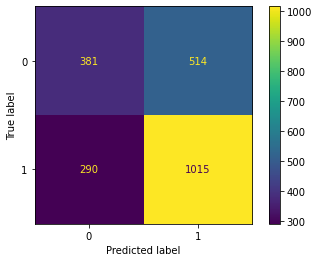

In [145]:
plot_confusion_matrix(log_model,X_test,y_test)

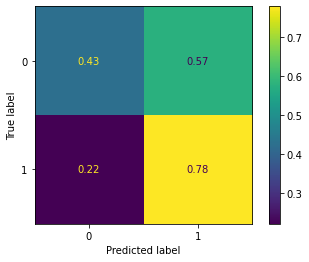

In [146]:
plot_confusion_matrix(log_model,X_test,y_test,normalize='true')

In [147]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.57      0.43      0.49       895
           1       0.66      0.78      0.72      1305

    accuracy                           0.63      2200
   macro avg       0.62      0.60      0.60      2200
weighted avg       0.62      0.63      0.62      2200



In [91]:
X_train.iloc[0]

Warehouse_block            4.000000
Customer_care_calls        3.000000
Customer_rating            5.000000
Prior_purchases            3.000000
Product_importance         0.000000
Gender                     0.000000
Cost_of_the_Product_tf    -0.613723
Discount_offered_tf        0.272262
Weight_in_gms_tf           0.306355
Mode_of_Shipment_Flight    0.000000
Mode_of_Shipment_Road      0.000000
Mode_of_Shipment_Ship      1.000000
Name: 8965, dtype: float64

In [92]:
y_train.iloc[0]

0

In [93]:
log_model.predict_proba(X_train.iloc[0].values.reshape(1, -1))

array([[0.76585204, 0.23414796]])

In [94]:
log_model.predict(X_train.iloc[0].values.reshape(1, -1))

array([0], dtype=int64)

### Evaluating Curves and AUC

In [95]:
from sklearn.metrics import precision_recall_curve,plot_precision_recall_curve,plot_roc_curve

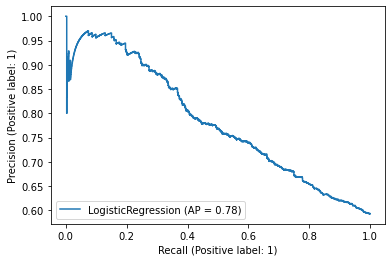

In [96]:
plot_precision_recall_curve(log_model,scaled_X_test,y_test)

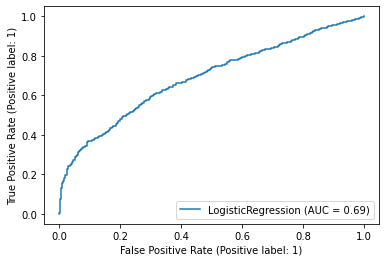

In [98]:
plot_roc_curve(log_model,scaled_X_test,y_test)

## Multi-Class Logistic Regression Model

In [99]:
df_new1 = df_new.copy()

In [102]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
log_model = LogisticRegression(solver='saga',multi_class="ovr",max_iter=5000)

### GridSearch for Best Hyper-Parameters

In [103]:
# Penalty Type
penalty = ['l1', 'l2']

# Use logarithmically spaced C values (recommended in official docs)
C = np.logspace(0, 4, 10)

In [104]:
grid_model = GridSearchCV(log_model,param_grid={'C':C,'penalty':penalty})

In [105]:
grid_model.fit(scaled_X_train,y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=5000, multi_class='ovr',
                                          solver='saga'),
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']})

In [106]:
grid_model.best_params_

{'C': 1.0, 'penalty': 'l1'}

### Model Performance on Classification Tasks

In [107]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [108]:
y_pred = grid_model.predict(scaled_X_test)

In [109]:
accuracy_score(y_test,y_pred)

0.6345454545454545

In [110]:
confusion_matrix(y_test,y_pred)

array([[ 381,  514],
       [ 290, 1015]], dtype=int64)

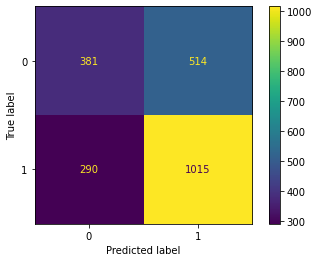

In [111]:
plot_confusion_matrix(grid_model,scaled_X_test,y_test)

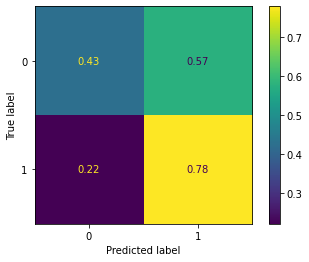

In [112]:
# Scaled so highest value=1
plot_confusion_matrix(grid_model,scaled_X_test,y_test,normalize='true')

In [113]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.57      0.43      0.49       895
           1       0.66      0.78      0.72      1305

    accuracy                           0.63      2200
   macro avg       0.62      0.60      0.60      2200
weighted avg       0.62      0.63      0.62      2200



## Evaluating Curves and AUC

In [114]:
from sklearn.metrics import roc_curve, auc

In [ ]:
# def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(5,5)):
#     y_score = clf.decision_function(X_test)

#     # structures
#     fpr = dict()
#     tpr = dict()
#     roc_auc = dict()

#     # calculate dummies once
#     y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
#     for i in range(n_classes):
#         fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
#         roc_auc[i] = auc(fpr[i], tpr[i])

#     # roc for each class
#     fig, ax = plt.subplots(figsize=figsize)
#     ax.plot([0, 1], [0, 1], 'k--')
#     ax.set_xlim([0.0, 1.0])
#     ax.set_ylim([0.0, 1.05])
#     ax.set_xlabel('False Positive Rate')
#     ax.set_ylabel('True Positive Rate')
#     ax.set_title('Receiver operating characteristic example')
#     for i in range(n_classes):
#         ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
#     ax.legend(loc="best")
#     ax.grid(alpha=.4)
#     sns.despine()
#     plt.show()

In [ ]:
# plot_multiclass_roc(log_model, scaled_X_test, y_test, n_classes=1, figsize=(16, 10))
# # plot_roc_curve(log_model,scaled_X_test,y_test)

# Decision Tree Classifier

In [148]:
from sklearn.tree import DecisionTreeClassifier

In [149]:
model = DecisionTreeClassifier()

In [117]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [118]:
base_pred = model.predict(X_test)

In [119]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

In [120]:
confusion_matrix(y_test,base_pred)

array([[495, 400],
       [390, 915]], dtype=int64)

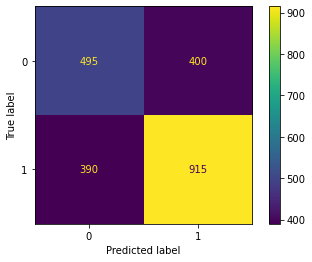

In [121]:
plot_confusion_matrix(model,X_test,y_test)

In [122]:
print(classification_report(y_test,base_pred))

              precision    recall  f1-score   support

           0       0.56      0.55      0.56       895
           1       0.70      0.70      0.70      1305

    accuracy                           0.64      2200
   macro avg       0.63      0.63      0.63      2200
weighted avg       0.64      0.64      0.64      2200



In [123]:
model.feature_importances_

array([0.04954026, 0.03892744, 0.03606365, 0.11201924, 0.02638929,
       0.01694977, 0.1671245 , 0.17736223, 0.34484318, 0.01343359,
       0.01070663, 0.00664023])

In [124]:
pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Feature Importance'])

,Feature Importance
Warehouse_block,0.049540
Customer_care_calls,0.038927
Customer_rating,0.036064
Prior_purchases,0.112019
Product_importance,0.026389
Gender,0.016950
Cost_of_the_Product_tf,0.167125
Discount_offered_tf,0.177362
Weight_in_gms_tf,0.344843
Mode_of_Shipment_Flight,0.013434


## Visualize the Tree

In [125]:
from sklearn.tree import plot_tree

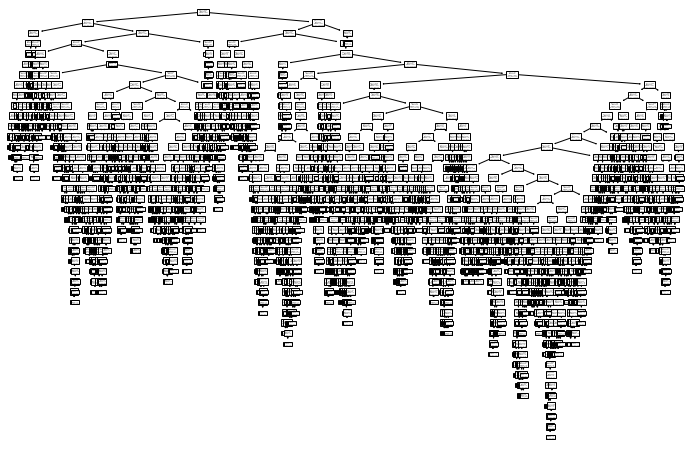

In [126]:
plt.figure(figsize=(12,8))
plot_tree(model);

### Hyperparameters

In [132]:
def report_model(model): #function reports back classification results and plots out the tree.
    model_preds = model.predict(X_test)
    print(classification_report(y_test,model_preds))
    print('\n')
    plt.figure(figsize=(12,8),dpi=150)
    plot_tree(model,filled=True,feature_names=X.columns);

In [133]:
pruned_tree = DecisionTreeClassifier(max_depth=2)
pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

              precision    recall  f1-score   support

           0       0.58      0.77      0.66       895
           1       0.80      0.62      0.70      1305

    accuracy                           0.68      2200
   macro avg       0.69      0.70      0.68      2200
weighted avg       0.71      0.68      0.68      2200





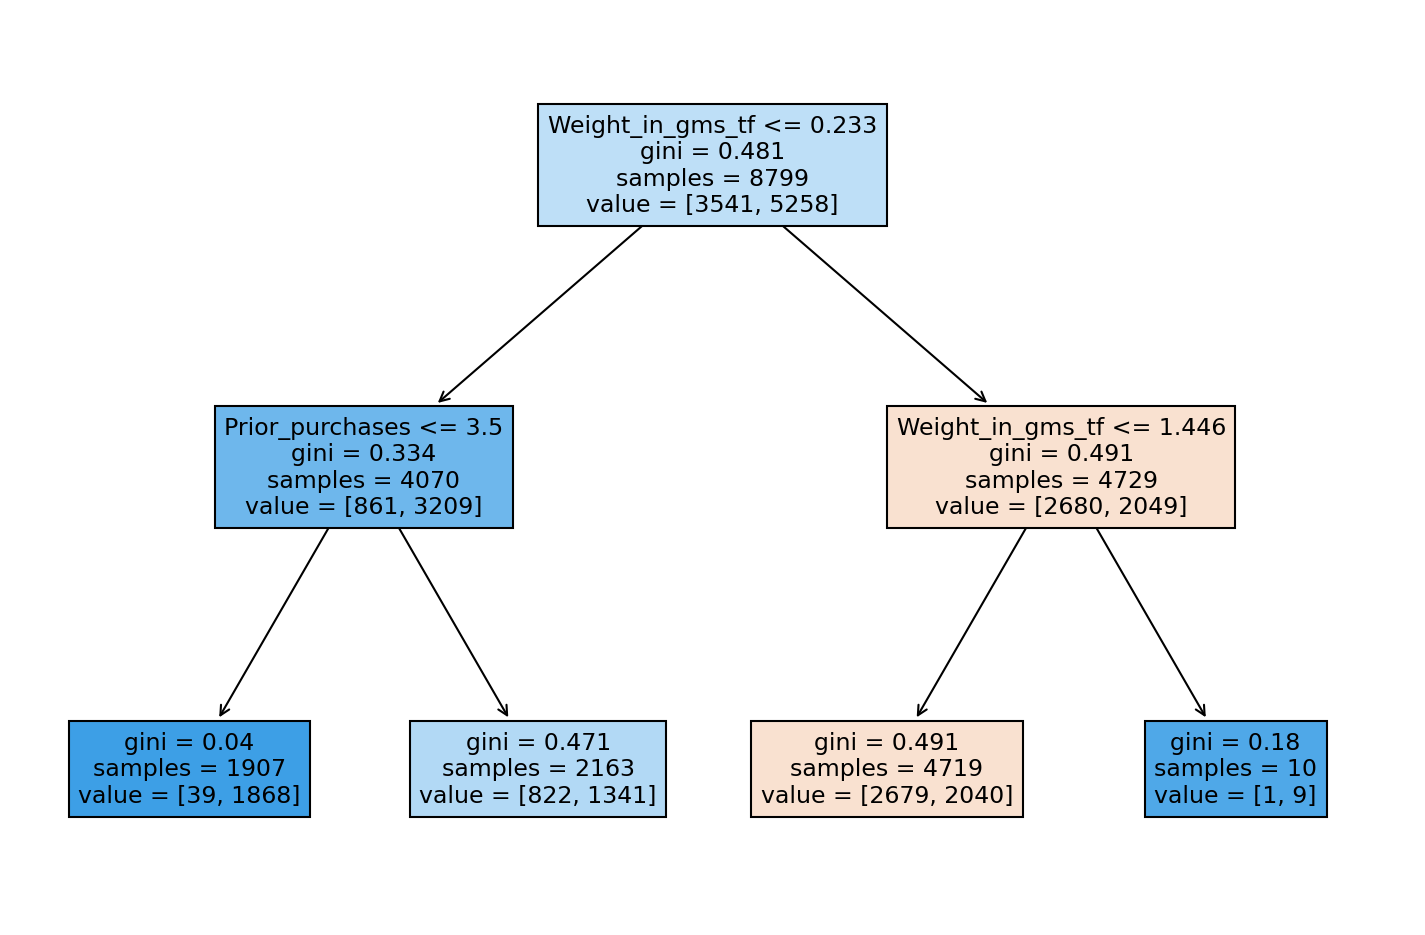

In [134]:
report_model(pruned_tree)

In [135]:
pruned_tree = DecisionTreeClassifier(max_leaf_nodes=3)
pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=3)

              precision    recall  f1-score   support

           0       0.58      0.77      0.66       895
           1       0.80      0.62      0.70      1305

    accuracy                           0.68      2200
   macro avg       0.69      0.70      0.68      2200
weighted avg       0.71      0.68      0.68      2200





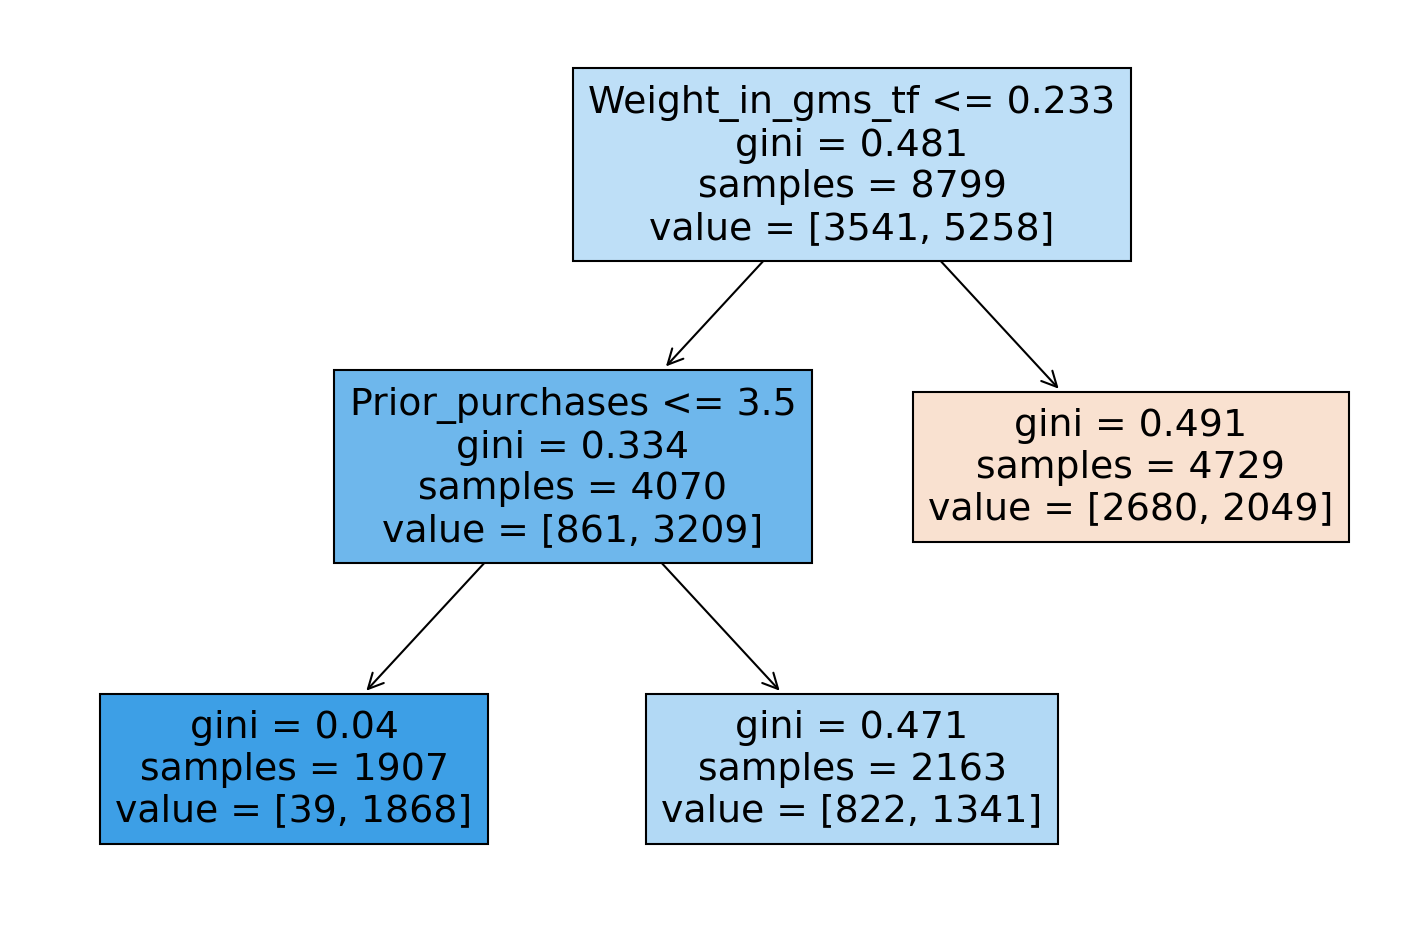

In [136]:
report_model(pruned_tree)

In [137]:
entropy_tree = DecisionTreeClassifier(criterion='entropy')
entropy_tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

              precision    recall  f1-score   support

           0       0.53      0.52      0.52       895
           1       0.67      0.68      0.68      1305

    accuracy                           0.62      2200
   macro avg       0.60      0.60      0.60      2200
weighted avg       0.61      0.62      0.61      2200





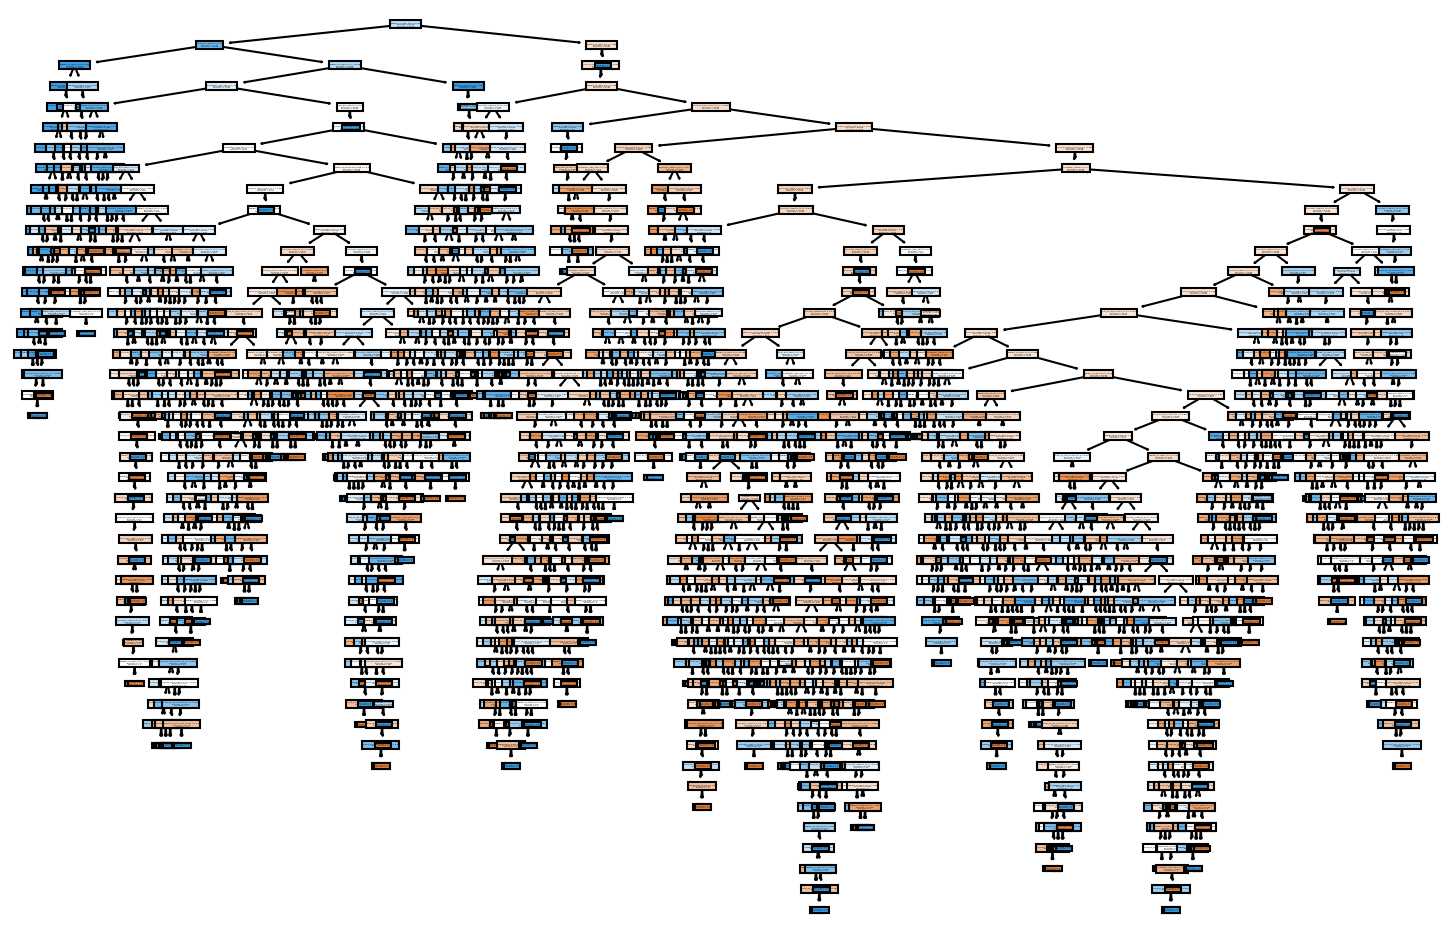

In [138]:
report_model(entropy_tree)

## Boosting Metdod 

In [160]:
from sklearn.ensemble import RandomForestClassifier

In [161]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.649090909090909


In [162]:
from sklearn.model_selection import GridSearchCV

In [163]:
n_estimators=[64,100,128,200]
max_features= [2,3,4]
bootstrap = [True,False]
oob_score = [True,False]

In [164]:
param_grid = {'n_estimators':n_estimators,
             'max_features':max_features,
             'bootstrap':bootstrap,
             'oob_score':oob_score} 

In [165]:
rfc = RandomForestClassifier()
grid = GridSearchCV(rfc,param_grid)

## Gradient Boosting and Grid Search with CV

In [171]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [172]:
from sklearn.ensemble import GradientBoostingClassifier

In [173]:
from sklearn.model_selection import GridSearchCV

In [174]:
param_grid = {"n_estimators":[1,5,10,20,40,100],'max_depth':[3,4,5,6]}

In [187]:
gb_model = GradientBoostingClassifier(max_depth= 3, n_estimators= 20)

In [176]:
gb_model= GridSearchCV(gb_model,param_grid)

In [188]:
gb_model.fit(X_train,y_train)

GradientBoostingClassifier(n_estimators=20)

In [186]:
grid.best_params_

{'max_depth': 3, 'n_estimators': 20}

In [182]:
.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6],
                         'n_estimators': [1, 5, 10, 20, 40, 100]})

In [189]:
y_pred = gb_model.predict(X_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.6648484848484848


In [181]:
gb_model = GradientBoostingClassifier(max_depth= 3, n_estimators= 20)
# log_model = LogisticRegression(C=0.012742749857031334, max_iter=2500, penalty='l1',
#                    solver='liblinear')

# E. Hyperparameter Tuning

In [150]:
logModel = LogisticRegression()

In [166]:
param_grid = {'n_estimators':n_estimators,
             'max_features':max_features,
             'bootstrap':bootstrap,
             'oob_score':oob_score} 

In [151]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

In [167]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(logModel, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

In [169]:
best_clf = clf.fit(X_train,y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


ValueError: Invalid parameter bootstrap for estimator LogisticRegression(). Check the list of available parameters with `estimator.get_params().keys()`.

In [154]:
best_clf.best_estimator_

LogisticRegression(C=0.012742749857031334, max_iter=2500, penalty='l1',
                   solver='liblinear')

In [ ]:
print(f'Accuracy: {best_clf.score(X,y):.4f}')

Accuracy: 0.5967


In [170]:
df_new.head(10)

,Warehouse_block,Customer_care_calls,Customer_rating,Prior_purchases,Product_importance,Gender,Reached_on_Time,Cost_of_the_Product_tf,Discount_offered_tf,Weight_in_gms_tf,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship
0,3,4,2,3,0,0,1,-0.573168,1.640229,-1.468240,1,0,0
1,4,4,5,2,0,1,1,-0.140355,-0.472686,-0.333893,1,0,0
2,0,2,2,4,0,1,1,-0.380399,-0.729526,-0.159002,1,0,0
3,1,3,3,4,1,1,1,0.227050,0.477129,-1.502484,1,0,0
4,2,2,2,3,1,0,1,-0.628341,-0.525786,-0.703244,1,0,0
5,4,3,1,3,1,0,1,-0.516956,-0.656939,-1.355722,1,0,0
6,3,3,4,3,0,0,1,0.242411,-0.272663,-0.772344,1,0,0
7,4,4,1,2,0,0,1,0.535206,-0.270924,-0.507561,1,0,0
8,0,3,4,3,0,0,1,-0.063167,0.434679,-1.084213,1,0,0
9,1,3,2,3,1,0,1,-0.091973,-0.726904,-1.496369,1,0,0


# 2. Feature Importance

Setelah mendapatkan model yang paling baik, lakukan interpretasi pada model dengan melihat feature importance-nya. Apa yang menyebabkan hasil prediksi model demikian <br>
* Feature Importance (Lihat feature yang paling penting, tarik business insight-nya, dan berikan action items berupa rekomendasi terhadap insight tersebut)
* Feature selection dari feature importance, dan lakukan iterasi modeling dengan feature yang dipilih



Dari nomor 2B, lakukan eksperimen dari approach ini, kelaskan pada laporan bagaimana hasilnya jika melakukan feature selection dari feature yang paling penting pada model <br>

Feature: 0, Score: 0.16320
Feature: 1, Score: -0.64301
Feature: 2, Score: 0.48497
Feature: 3, Score: -0.46190
Feature: 4, Score: 0.18432
Feature: 5, Score: -0.11978
Feature: 6, Score: -0.40602
Feature: 7, Score: 0.03772
Feature: 8, Score: -0.51785
Feature: 9, Score: 0.26540


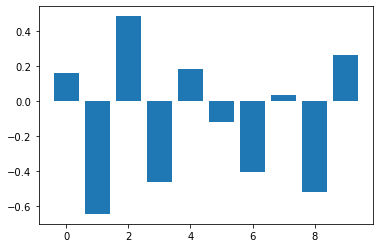

In [ ]:

# logistic regression for feature importance
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# define the model
model = LogisticRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
lr.feature_importances_

AttributeError: 'LogisticRegression' object has no attribute 'feature_importances_'

# 3. Git
Dari semua project yang telah dilakukan dari stage 1 hingga stage 3, upload project 